<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/metodoOtisu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# método de otsu

Faz uso de um limiar global, a diferença é que a escolha do limiar é feita de forma automatica e nao manual.


In [2]:
import cv2 # openCv usada pra visao computacional
import numpy as np
from matplotlib import pyplot as plt # vizualizacao
from google.colab.patches import cv2_imshow # visualizar imagens

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!cp -R /content/drive/MyDrive/CNN-UNET/imagens imagens

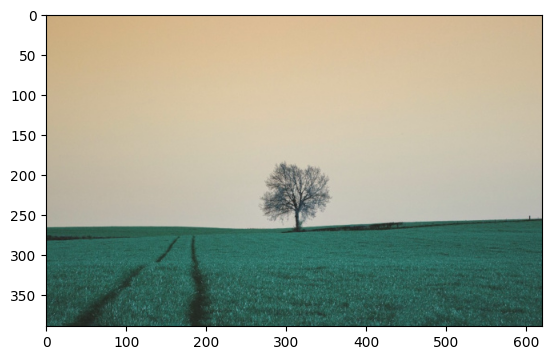

In [5]:
img = cv2.imread('/content/imagens/paisagem01.jpg') # imagem
plt.imshow(img); # ver imagem

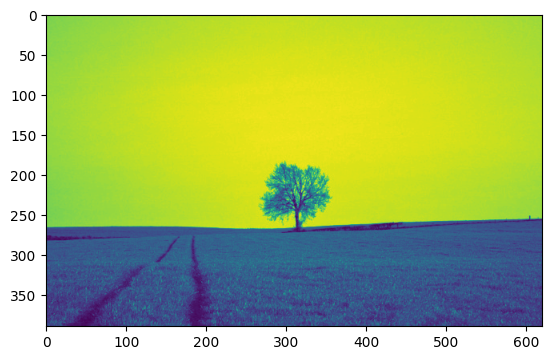

In [6]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray);

In [7]:
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print('valor de limiar ots: ', valor)

valor de limiar ots:  136.0


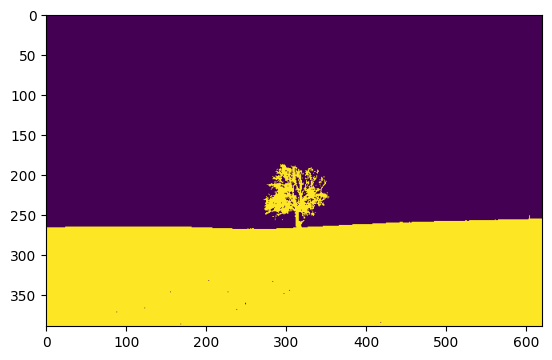

In [8]:
plt.imshow(otsu);

# Histogramas

In [9]:
histograma, bins = np.histogram(gray, 256, [0,256]) # vai de 0 a 255 que sao os valores de rgb
histograma

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          3,    3,   15,   36,   54,   88,  127,  164,  205,  253,  231,
        201,  190,  214,  211,  220,  216,  239,  260,  254,  297,  329,
        399,  454,  475,  568,  645,  701,  775,  839,  957, 1077, 1136,
       1260, 1364, 1424, 1583, 1680, 1778, 1884, 1949, 2054, 2304, 2328,
       2452, 2512, 2630, 2590, 2607, 2563, 2580, 2583, 2418, 2406, 2354,
       2206, 2124, 2018, 1824, 1595, 1559, 1365, 1158, 1007,  865,  683,
        610,  508,  435,  364,  313,  245,  244,  200,  190,  140,  142,
        133,  130,   84,  122,   83,   88,   75,   90,   66,   62,   66,
         58,   62,   76,   52,   61,   69,   57,   52,   54,   53,   58,
         48,   54,   66,   48,   60,   66,   55,   55,   44,   59,   72,
         52,   59,   52,   54,   48,   53,   50,   

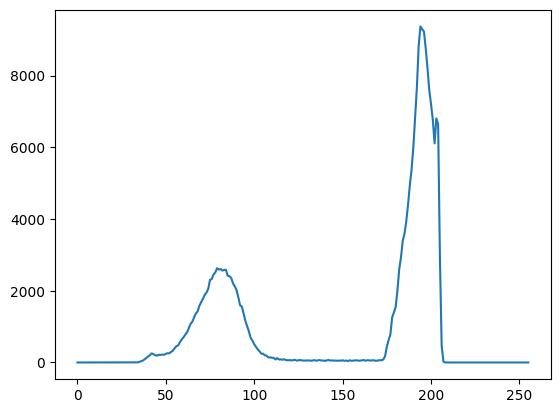

In [10]:
plt.plot(histograma);

In [11]:
gray.shape

(389, 620)

In [12]:
gray.ravel()

array([170, 172, 173, ...,  62,  56,  58], dtype=uint8)

In [13]:
gray.shape, gray.ravel().shape, 389 * 620

((389, 620), (241180,), 241180)

<ipython-input-15-f8a5ff92b437>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256]);


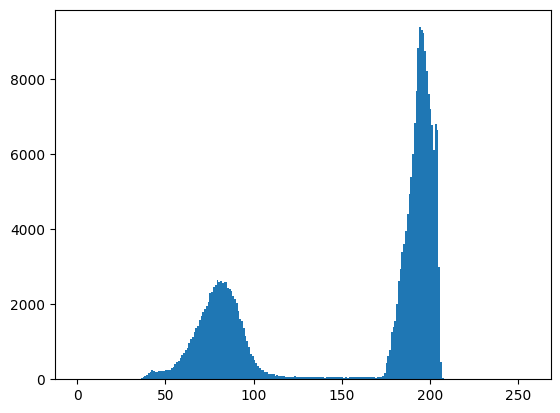

In [15]:
plt.hist(gray.ravel(), 256, [0, 256]);

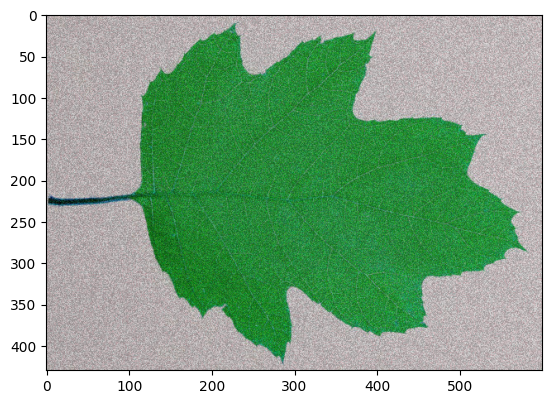

In [16]:
img = cv2.imread('/content/imagens/folha_ruido.jpg') # imagem
plt.imshow(img); # ver imagem

<ipython-input-22-13086c11d984>:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray.ravel(), 256, [0, 256]);


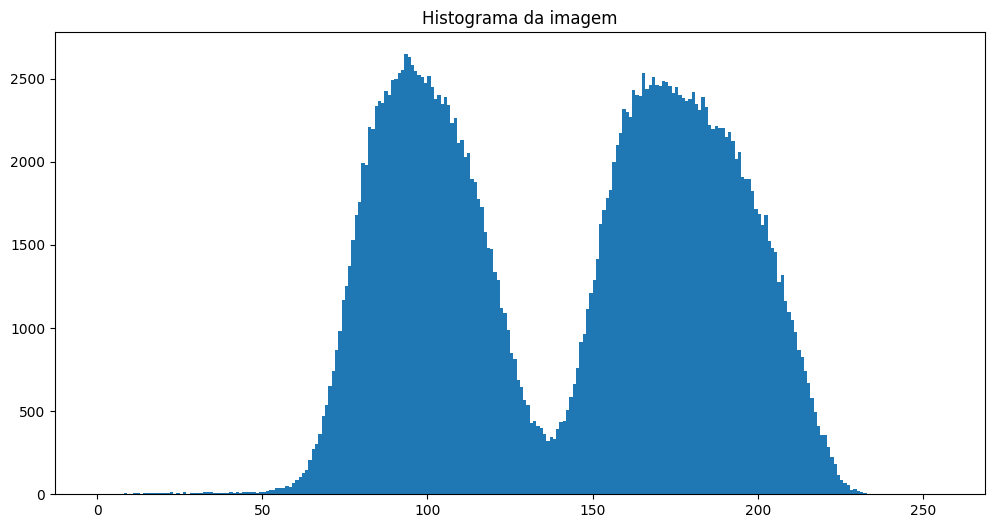

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.hist(gray.ravel(), 256, [0, 256]);
plt.title('Histograma da imagem')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [24]:
valor, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('valor de limiar ots: ', valor)

valor de limiar ots:  138.0


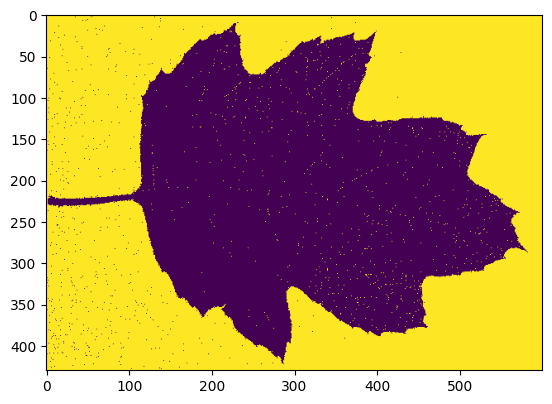

In [25]:
plt.imshow(otsu);

array([[168, 167, 168, ..., 189, 185, 182],
       [166, 166, 167, ..., 188, 184, 182],
       [166, 166, 168, ..., 188, 184, 182],
       ...,
       [166, 167, 168, ..., 177, 177, 179],
       [167, 166, 165, ..., 176, 178, 180],
       [168, 166, 164, ..., 175, 179, 181]], dtype=uint8)
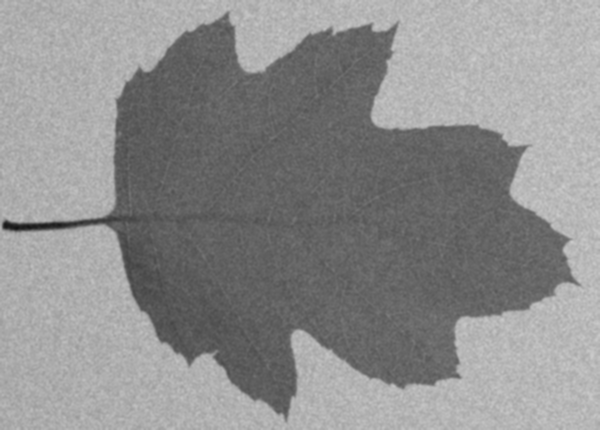

In [27]:
desfoque = cv2.GaussianBlur(gray, (5, 5), 0)
desfoque

In [28]:
valor, otsu = cv2.threshold(desfoque, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('valor de limiar ots: ', valor)

valor de limiar ots:  138.0


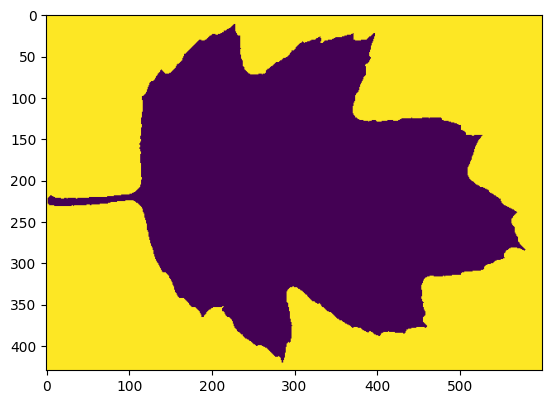

In [29]:
plt.imshow(otsu);

<ipython-input-30-f5a3c7bcd826>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(desfoque.ravel(), 256, [0, 256]);


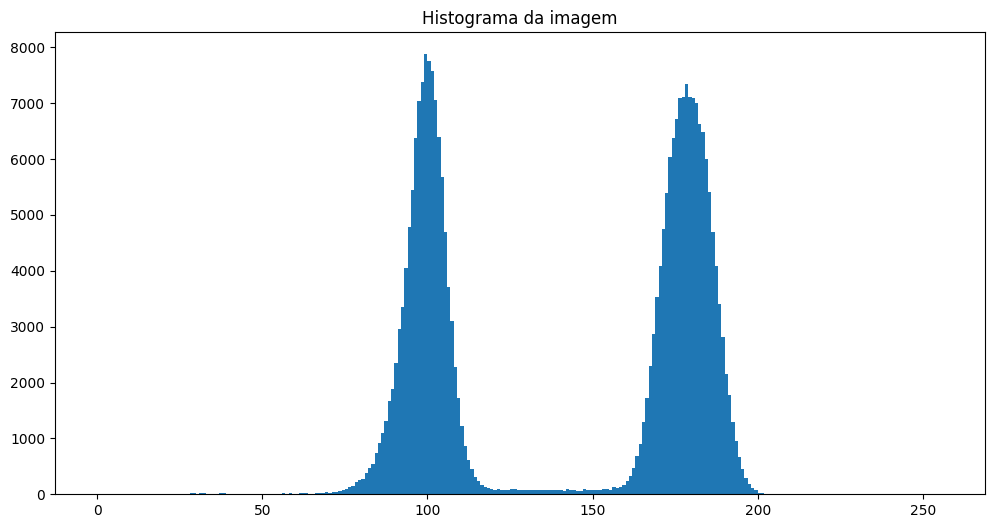

In [30]:
plt.hist(desfoque.ravel(), 256, [0, 256]);
plt.title('Histograma da imagem')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()